In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [311]:
Attributes = ['Age','Year of operation','Number of positive cases','Survival status']
df = pd.read_csv('./KNN/haberman.data',names = Attributes)

In [312]:
df

Age  Year of operation  Number of positive cases  Survival status
0     30                 64                         1                1
1     30                 62                         3                1
2     30                 65                         0                1
3     31                 59                         2                1
4     31                 65                         4                1
..   ...                ...                       ...              ...
301   75                 62                         1                1
302   76                 67                         0                1
303   77                 65                         3                1
304   78                 65                         1                2
305   83                 58                         2                2

[306 rows x 4 columns]

### Splitting data 

In [320]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, df.columns != 'Survival status'], df['Survival status']
seed = 1
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Normalizing train data 

In [321]:
avg = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - avg) / std

### Normalizing test data 

In [322]:
avg = np.mean(X_test)
std = np.std(X_test)
X_test = (X_test - avg) / std

### Calculating the amount of train accuracy and loss for k ranging between 1 to 40

In [323]:
train_accuracy = []
train_loss=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    train_accuracy.append(np.mean(accuracy_score(pred_i,y_train)))
    train_loss.append(np.mean(pred_i != y_train))

### Plotting the figure of Accuracy changes for train data with k ranging between 1 to 40

Text(0.5, 1.0, 'Train Accuracy')

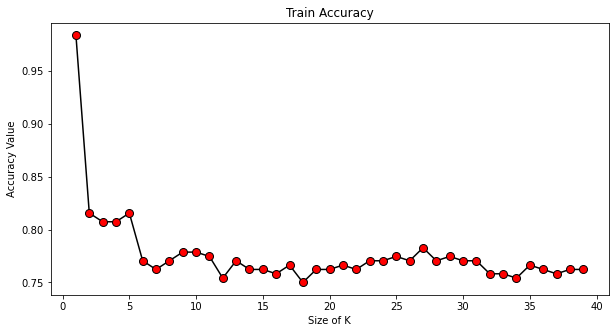

In [324]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), train_accuracy, color='black', linestyle='solid', marker='o',markerfacecolor='red', markersize=8)
plt.xlabel('Size of K')
plt.ylabel('Accuracy Value')
plt.title('Train Accuracy')

### Plotting the figure of Loss changes for train data with k ranging between 1 to 40

Text(0.5, 1.0, 'Train Loss')

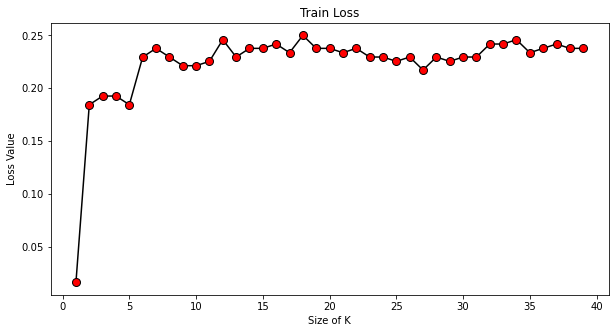

In [325]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), train_loss, color='black', linestyle='solid', marker='o',markerfacecolor='red', markersize=8)
plt.xlabel('Size of K')
plt.ylabel('Loss Value')
plt.title('Train Loss')

### Plotting the figure of accuracy changes for test data with k variating between 1 to 40

Text(0.5, 1.0, 'Test Accuracy')

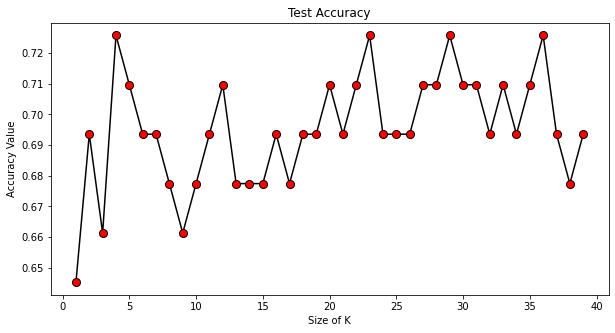

In [326]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), test_accuracy, color='black', linestyle='solid', marker='o',markerfacecolor='red', markersize=8)
plt.xlabel('Size of K')
plt.ylabel('Accuracy Value')
plt.title('Test Accuracy')

### Calculating the amount of test accuary and loss for k ranging between 1 to 40

In [327]:
test_accuracy = []
test_loss=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    test_accuracy.append(np.mean(accuracy_score(pred_i,y_test)))
    test_loss.append(np.mean(pred_i != y_test))

### Plotting the figure of loss changes for test data with k ranging between 1 to 40

Text(0.5, 1.0, 'Test Loss')

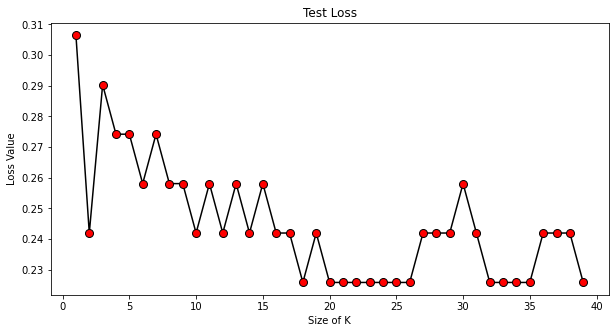

In [328]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), test_loss, color='black', linestyle='solid', marker='o',markerfacecolor='red', markersize=8)
plt.xlabel('Size of K')
plt.ylabel('Loss Value')
plt.title('Test Loss')

In [329]:
X_test

Age  Year of operation  Number of positive cases
89  -0.579925          -1.680073                 -0.353140
58  -0.907536          -0.694289                 -0.072439
70  -0.825633          -0.037099                 -0.353140
305  2.450479          -1.680073                 -0.353140
112 -0.416119           0.291495                 -0.633841
..        ...                ...                       ...
154 -0.088508           0.620090                 -0.633841
0   -1.890370           0.291495                 -0.493491
251  0.812423          -0.694289                  0.629314
78  -0.743730          -0.694289                 -0.633841
260  0.976229          -0.365694                  2.453871

[62 rows x 3 columns]

### Running algorithm for 4 different values of k including small values and big values

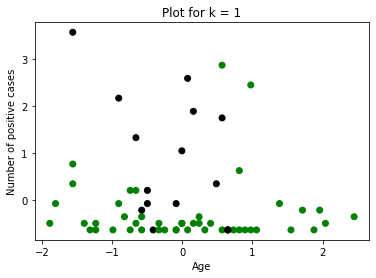

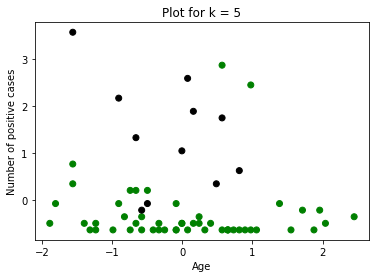

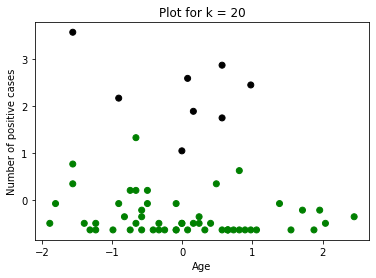

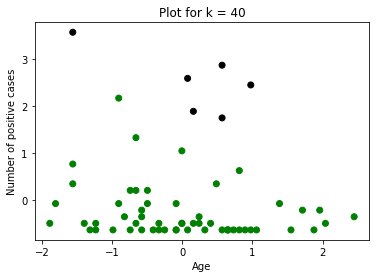

In [333]:
Number_of_positive_cases = X_test[['Number of positive cases']].values
Ages = X_test[['Age']].values
K = [1,5,20,40]

for i in range(0,4):
    knn= KNeighborsClassifier(n_neighbors=K[i])
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test) 
    mycmap = colors.ListedColormap(['green', 'black'])
    plt.scatter(x=Ages, y=Number_of_positive_cases,cmap=mycmap, c = y_pred)
    plt.xlabel('Age')
    plt.ylabel('Number of positive cases')
    plt.title(f"Plot for k = {K[i]}")
    plt.show()

### Applying grid search method

In [340]:
params = dict(n_neighbors=np.arange(1, 40))
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


### Best amount for k is :

In [341]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=20)